<a href="https://colab.research.google.com/github/CahitKOK/Tensorflow/blob/main/Fashion_Mist(Picture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.8.2


In [7]:
# Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

In [8]:
#Complie the model 
model.compile(optimizer = "sgd",loss="mean_squared_error")

#Optimizer String (name of optimizer) or optimizer instance
#Loss function. May be a string (name of loss function)

Optimizer 

Modules

experimental module: Public API for tf.keras.optimizers.experimental namespace.

legacy module: Public API for tf.keras.optimizers.legacy namespace.

schedules module: Public API for tf.keras.optimizers.schedules namespace.

Classes

class Adadelta: Optimizer that implements the Adadelta algorithm.

class Adagrad: Optimizer that implements the Adagrad algorithm.

class Adam: Optimizer that implements the Adam algorithm.

class Adamax: Optimizer that implements the Adamax algorithm.

class Ftrl: Optimizer that implements the FTRL algorithm.

class Nadam: Optimizer that implements the NAdam algorithm.

class Optimizer: Base class for Keras optimizers.

class RMSprop: Optimizer that implements the RMSprop algorithm.

class SGD: Gradient descent (with momentum) optimizer.

Functions

deserialize(...): Inverse of the serialize function.

get(...): Retrieves a Keras Optimizer instance.

serialize(...): Serialize the optimizer configuration to JSON compatible python dict.

To be implemented by subclasses:

call(): Contains the logic for loss calculation using y_true, y_pred.
Example subclass implementation:


class MeanSquaredError(Loss):

  def call(self, y_true, y_pred):
    return tf.reduce_mean(tf.math.square(y_pred - y_true), axis=-1)
When used with tf.distribute.Strategy, outside of built-in training loops such as tf.keras compile and fit, please use 'SUM' or 'NONE' reduction types, and reduce losses explicitly in your training loop. Using 'AUTO' or 'SUM_OVER_BATCH_SIZE' will raise an error.


In [9]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [4]:
# Train the model
model.fit(xs, ys, epochs=500)

NameError: ignored

Args

x	Input data. 

y	Target data.

y_pred	Predictions returned by the model (output of model(x))

sample_weight	Sample weights for weighting the loss function.

In [12]:
# Make a prediction
print(model.predict([10.0]))

[[18.981636]]


In [5]:
#Load the Fashion MNIST Dataset
fmnist = tf.keras.datasets.fashion_mnist

In [6]:
from tensorflow.python import training
#Load the training and test split of Fashin MNIST Dataset
(training_images,training_labels),(test_images,test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


LABEL: 1

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0  97  84  97 110 108  87  97   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 255 199 183 142 161 200 213  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 174 173 158 131 132 176 176  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 180 163 120 180 126 139 168 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 156 180 162 171 170 183 163 169 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159 177 163 174 166 173 170 163 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160 182 160 168 175 167 157 168 139   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 185 161 171 184 176 160 175 131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 188 

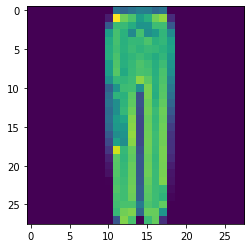

In [7]:
import matplotlib.pyplot as plt

#You can put between 0 to 59999 here
index=1000

#Set number of characters per row when printing
np.set_printoptions(linewidth=320)

#Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [8]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

 The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them.

In [29]:
#Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0: 
  return x

else: 
  return 0
In other words, it only passes values 0 or greater to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class.

In [30]:

# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [28]:
inputs.dtype
outputs.dtype


tf.float32

In [31]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5023 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3349 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3111 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2938 - accuracy: 0.8912


In [32]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8760


[0.34094154834747314, 0.8759999871253967]

Exercise 1 : 


In [36]:
classifications = model.predict(test_images)

print(classifications[0])

[3.4945009e-07 3.2970431e-07 5.1941784e-09 3.5726826e-09 1.1323950e-07 8.9856405e-03 2.1495678e-07 6.2743463e-02 1.1932357e-05 9.2825800e-01]


In [35]:
print(test_labels[0])

9


In [37]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1855
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0766
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0478
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0356
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0781
[1.5770266e-09 2.7720790e-09 1.7692274e-07 3.5342021e-06 1.6597677e-12 2.7537452e-09 1.5100801e-12 9.9999464e-01 2.6595719e-11 1.7110359e-06]
7


In [38]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0 # Experiment with removing this line
test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2019
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0807
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0531
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0385
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0714
[1.5137810e-10 7.1926737e-10 1.2069473e-09 4.3805674e-08 1.5931329e-14 1.3387230e-10 1.8122931e-15 9.9999988e-01 4.0089367e-09 5.7781151e-08]
7


Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action.

In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.4749 - accuracy: 0.8309
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4752 - accuracy: 0.8309
